In [1]:
import numpy as np
import pylab as p
import scipy.integrate  as  ode
import matplotlib.pyplot  as  plt
import matplotlib.cm as cm
import networkx as nx

import math
import timeit
import itertools 

np.set_printoptions(linewidth = 130, precision = 13)
%matplotlib inline

from scipy.optimize import fsolve
from scipy import integrate
from matplotlib import animation, rc

In [2]:
n = 10
b = (np.random.rand(n,1) - 0.5)*10
nu1d = np.zeros((n,1)) #(np.random.rand(n,1) - 0.5)*10
nu2d = (np.random.rand(n,n) - 0.5)*10
alp = np.zeros((n,n))

In [3]:
#parameters
beta = 4
R0 = 6
k = 6
m = beta/R0
#gamm =(np.random.rand(1) - 0.5)*10

#computation
S_star = m/beta
T_star = 1 - S_star
I_star = m*T_star/(m + beta*k*T_star)
J_star = T_star - I_star
detP = -I_star*J_star + 2*(T_star)**2

# teth1 = 1 #-2*m*(T_star)**2/detP
# teth2 = R0/2* 1/(1 + k*(R0 - 1))* (1+ 1/(1 + k*(R0 - 1)))# gamm*I_star*(I_star + T_star)/detP
# teth3 = R0/2*k*(R0 - 1)/(1 + k*(R0 - 1))# gamm*T_star*J_star/detP
# teth4 = beta*k/2*((R0 - 1)/(1 + k*(R0 - 1)))**2 #-m*(J_star)**2/detP
mu = 1/(k*(R0 - 1))

teth1 = -2*S_star*(T_star)**2/detP
teth2 = -I_star*(I_star + T_star)/detP
teth3 = -T_star*J_star/detP
teth4 = -beta*T_star*I_star*(J_star)/detP
Teth = teth1 + teth2 + teth3 + teth4

lamd = np.zeros((n,n))
for i in range (0, n):
    for j in range (0, n):
        lamd[i][j] = teth1*(b[i] - b[j]) + teth2*(nu1d[i] - nu1d[j]) + teth3*(nu2d[i][j] + nu2d[j][i] - 2*nu2d[j][j]) + teth4*(mu*(alp[j][i] - alp[i][j]) + alp[j][i] - alp[j][j])
        #replicator system
def du_dt(u, t = 0):
    return Teth*u*(np.dot(lamd,u) - np.dot(np.dot(lamd,u),u))

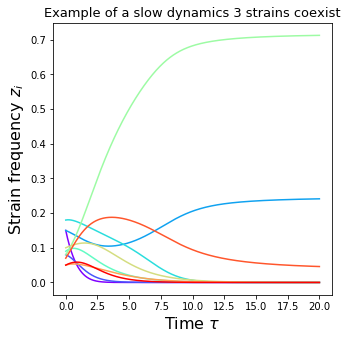

In [31]:
#u0 = np.random.random(n) #random initial data
#u0 = u0/sum(u0)
u0 = np.array([0.15, 0.08, 0.15, 0.18, 0.09, 0.08, 0.1, 0.05, 0.07, 0.05])
t = np.linspace(0, 20, 1000)

u, infodict = integrate.odeint(du_dt, u0, t, full_output = True)
infodict['message']
s = []
for i in range(0, n):
    s.append(u.T[i])
    
colors = cm.rainbow(np.linspace(0, 1, n))

f1 = plt.figure(figsize = (5,5))
for i in range(0, n):
    plt.plot(t, s[i], color = colors[i])

plt.xlabel("Time $\\tau$", fontsize = 16)
plt.ylabel("Strain frequency $z_i$", fontsize = 16)
plt.title('Example of a slow dynamics 3 strains coexist', fontsize = 13)
plt.show()

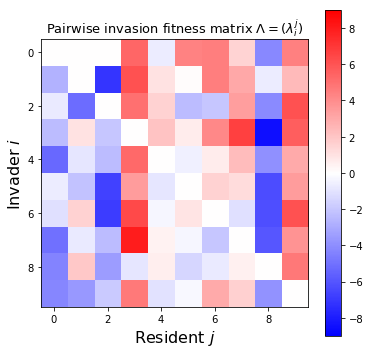

In [32]:
a = np.floor(lamd.min())
f2 = plt.figure(figsize = (6,6))
plt.imshow(lamd, interpolation='none', cmap = 'bwr', vmin= a, vmax=-a)
plt.xlabel("Resident $j$", fontsize = 16)
plt.ylabel("Invader $i$", fontsize = 16)
plt.title('Pairwise invasion fitness matrix $ \\Lambda = (\\lambda^j_i)$', fontsize = 13)
plt.colorbar()
plt.show()

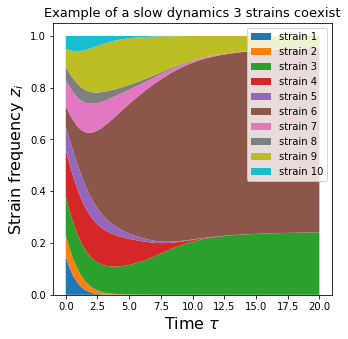

In [33]:
labels = []
for i in range(0,n):
    labels.append('strain {}'.format(i+1))
    
f3 = plt.figure(figsize = (5,5))
plt.stackplot(t, s, labels = labels)

plt.xlabel("Time $\\tau$", fontsize = 16)
plt.ylabel("Strain frequency $z_i$", fontsize = 16)
plt.title('Example of a slow dynamics 3 strains coexist', fontsize = 13)
plt.legend(loc='best')
plt.show()